# Installing, importing packages and dataset


Installing and importing required packages


In [ ]:
!pip install dmba
!pip install shap
!pip install lime

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 37.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 4.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=fa918844531b67f30c779a42a3a21fdfdc6ee8e7ecb8eba153de53f918f6a059
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [ ]:
#loading our usual libraries


import shap

#pandas and numpy
import pandas as pd
import numpy as np

#Scikit stuff
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, \
                            BaggingClassifier, BaggingRegressor, \
                            GradientBoostingRegressor, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, KFold, cross_validate, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix, \
                            classification_report, precision_score, \
                            accuracy_score, roc_curve, roc_auc_score
# import scikitplot as skplt

#dmba stuff
from dmba import regressionSummary, exhaustive_search
from dmba import adjusted_r2_score, AIC_score, BIC_score
from dmba import classificationSummary, gainsChart, liftChart, plotDecisionTree

# visualization and tuning the aesthetics
import matplotlib.pylab as plt
import seaborn as sns
%matplotlib inline
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1, rc={"lines.linewidth": 2,'font.family': [u'times']})
# plt.style.use('seaborn-whitegrid')
plt.rc('text', usetex = False)
plt.rc('font', family = 'serif')
plt.rc('xtick', labelsize = 8)
plt.rc('ytick', labelsize = 8)
plt.rc('font', size = 12)
plt.rc('figure', figsize = (6, 5))



In [ ]:
import pandas as pd
import numpy as np
import datetime

Importing world_data.csv from drive folder


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
worlddata = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Large Data Sets for Python/worlddata.csv')
worlddata.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
0,Arab World,ARB,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1960,1.335609e+02
1,Arab World,ARB,Age dependency ratio (% of working-age populat...,SP.POP.DPND,1960,8.779760e+01
2,Arab World,ARB,"Age dependency ratio, old (% of working-age po...",SP.POP.DPND.OL,1960,6.634579e+00
3,Arab World,ARB,"Age dependency ratio, young (% of working-age ...",SP.POP.DPND.YG,1960,8.102333e+01
4,Arab World,ARB,Arms exports (SIPRI trend indicator values),MS.MIL.XPRT.KD,1960,3.000000e+06


In [ ]:
Indicator_Values = worlddata.IndicatorName.unique()
Indicator_Values

array(['Adolescent fertility rate (births per 1,000 women ages 15-19)',
       'Age dependency ratio (% of working-age population)',
       'Age dependency ratio, old (% of working-age population)', ...,
       'Fish species, threatened', 'Mammal species, threatened',
       'Plant species (higher), threatened'], dtype=object)

In [ ]:
## financial_indicators
# Foreign direct investment, net inflows (% of GDP)
# High-technology exports (% of manufactured exports)
# Tax revenue (% of GDP)
# Interest payments (% of revenue)
# Domestic credit to private sector (% of GDP)
# Cost of business start-up procedures (% of GNI per capita)
# Net ODA received (% of GNI)
# Market capitalization of listed domestic companies (% of GDP)
# Gross savings (% of GDP)
# Adjusted net savings, excluding particulate emission damage (% of GNI)
## trade_indicators
# Exports of goods and services (current US$)
# Imports of goods and services (current US$)
# Merchandise trade (% of GDP)
# Time to export (days)
# Time to import (days)
# Cost to export (US$ per container)
# Cost to import (US$ per container)
# Insurance and financial services (% of commercial service imports)
## infrastructure_indicators
# Logistics performance index: Overall (1=low to 5=high)
# Quality of port infrastructure, WEF (1=extremely underdeveloped to 7=well developed and efficient by international standards)
# Time required to get electricity (days)
# Electricity production from renewable sources (% of total)
# Roads, paved (% of total roads)
# labor_indicators
# Labor force participation rate, total (% of total population ages 15+)
# Employment to population ratio, 15+, total (%) (modeled ILO estimate)
# Unemployment, total (% of total labor force) (modeled ILO estimate)
# Part-time employment, total (% of total employment)
# Long-term unemployment (% of total unemployment)
# Wage and salaried workers, total (% of total employed)
## business_indicators
# Ease of doing business index (1=most business-friendly regulations)
# Business extent of disclosure index (0=less disclosure to 10=more disclosure)
# Strength of legal rights index (0=weak to 12=strong)
# Regulatory quality index (score)
# Political stability and absence of violence/terrorism index
## technology_indicators
# Internet users (per 100 people)
# Research and development expenditure (% of GDP)
# ICT service exports (% of service exports, BoP)
# Mobile cellular subscriptions (per 100 people)
# Secure Internet servers (per 1 million people)
## poverty_indicators
# Poverty headcount ratio at $1.90 a day (2011 PPP) (% of population)
# Poverty headcount ratio at $3.10 a day (2011 PPP) (% of population)
# Poverty headcount ratio at $5.50 a day (2011 PPP) (% of population)
# Poverty headcount ratio at national poverty lines (% of population)
## environment_indicators
# Adjusted savings: particulate emission damage (% of GNI)
# Adjusted net savings, including particulate emission damage (% of GNI)
# CO2 emissions (kg per PPP $ of GDP)
# Water productivity, total (constant 2005 US$ GDP per cubic meter of total freshwater withdrawal)

In [ ]:
# prompt: # prompt: create lists with ## as the list name and # as its elements of list from the above code block and remove the trailing #

financial_indicators = [
    "Foreign direct investment, net inflows (% of GDP)",
    "High-technology exports (% of manufactured exports)",
    "Tax revenue (% of GDP)",
    "Interest payments (% of revenue)",
    "Domestic credit to private sector (% of GDP)",
    "Cost of business start-up procedures (% of GNI per capita)",
    "Net ODA received (% of GNI)",
    "Market capitalization of listed domestic companies (% of GDP)",
    "Gross savings (% of GDP)",
    "Adjusted net savings, excluding particulate emission damage (% of GNI)"
]

trade_indicators = [
    "Exports of goods and services (current US$)",
    "Imports of goods and services (current US$)",
    "Merchandise trade (% of GDP)",
    "Time to export (days)",
    "Time to import (days)",
    "Cost to export (US$ per container)",
    "Cost to import (US$ per container)",
    "Insurance and financial services (% of commercial service imports)"
]

infrastructure_indicators = [
    "Logistics performance index: Overall (1=low to 5=high)",
    "Quality of port infrastructure, WEF (1=extremely underdeveloped to 7=well developed and efficient by international standards)",
    "Time required to get electricity (days)",
    "Electricity production from renewable sources, excluding hydroelectric (% of total)"

]

labor_indicators = [
    "Labor force participation rate, total (% of total population ages 15+) (national estimate)",
    "Employment to population ratio, 15+, total (%) (modeled ILO estimate)",
    "Unemployment, total (% of total labor force) (national estimate)",
    "Long-term unemployment (% of total unemployment)",
    "Wage and salaried workers, total (% of total employed)"
]

business_indicators = [
    "Ease of doing business index (1=most business-friendly regulations)",
    "Business extent of disclosure index (0=less disclosure to 10=more disclosure)",
    "Strength of legal rights index (0=weak to 12=strong)",
]

technology_indicators = [
    "Internet users (per 100 people)",
    "Research and development expenditure (% of GDP)",
    "ICT service exports (% of service exports, BoP)",
    "Mobile cellular subscriptions (per 100 people)",
    "Secure Internet servers (per 1 million people)"
]

poverty_indicators = [
    "Poverty headcount ratio at $1.90 a day (2011 PPP) (% of population)",
    "Poverty headcount ratio at $3.10 a day (2011 PPP) (% of population)",
    "Poverty headcount ratio at national poverty lines (% of population)"
]

environment_indicators = [
    "Adjusted savings: particulate emission damage (% of GNI)",
    "Adjusted net savings, including particulate emission damage (% of GNI)",
    "CO2 emissions (kg per PPP $ of GDP)",
    "Water productivity, total (constant 2005 US$ GDP per cubic meter of total freshwater withdrawal)"
]

#Data Cleaning


In [ ]:
wd_pivot=pd.pivot_table(worlddata, values='Value', index=['CountryName','CountryCode', 'Year'], columns=['IndicatorName'])
wd_pivot

IndicatorName                 2005 PPP conversion factor, GDP (LCU per international $)  \
CountryName CountryCode Year                                                              
Afghanistan AFG         1960                                                NaN           
                        1961                                                NaN           
                        1962                                                NaN           
                        1963                                                NaN           
                        1964                                                NaN           
...                                                                         ...           
Zimbabwe    ZWE         2011                                                NaN           
                        2012                                                NaN           
                        2013                                                NaN           
                        2014                                                NaN           
                        2015                                                NaN           

IndicatorName                 2005 PPP conversion factor, private consumption (LCU per international $)  \
CountryName CountryCode Year                                                                              
Afghanistan AFG         1960                                                NaN                           
                        1961                                                NaN                           
                        1962                                                NaN                           
                        1963                                                NaN                           
                        1964                                                NaN                           
...                                                                         ...                           
Zimbabwe    ZWE         2011                                                NaN                           
                        2012                                                NaN                           
                        2013                                                NaN                           
                        2014                                                NaN                           
                        2015                                                NaN                           

IndicatorName                 ARI treatment (% of children under 5 taken to a health provider)  \
CountryName CountryCode Year                                                                     
Afghanistan AFG         1960                                                NaN                  
                        1961                                                NaN                  
                        1962                                                NaN                  
                        1963                                                NaN                  
                        1964                                                NaN                  
...                                                                         ...                  
Zimbabwe    ZWE         2011                                               48.0                  
                        2012                                                NaN                  
                        2013                                                NaN                  
                        2014                                                NaN                  
                        2015                                                NaN                  

IndicatorName                 Access to electricity (% of population)  \
CountryName CountryCode Year                                            
Afg

In [ ]:
# # prompt: drop the coulmns which have more than 40% values in the coumn as NAN

# # Calculate the percentage of missing values in each column
# missing_percentage = wd_pivot.isnull().sum() / len(wd_pivot)

# # Identify columns with more than 40% missing values
# columns_to_drop = missing_percentage[missing_percentage > 0.2].index

# # Drop the identified columns from the DataFrame
# wd_pivot_m = wd_pivot.drop(columns=columns_to_drop)
# wd_pivot_m

In [ ]:

latest_year = wd_pivot.index.get_level_values('Year').max()
print(latest_year)

# Filter the DataFrame for years from 2000 to the latest year
filtered_wd_pivot_greater_2000 = wd_pivot[wd_pivot.index.get_level_values('Year') >= 2000]
filtered_wd_pivot_lesser_2000 = wd_pivot[wd_pivot.index.get_level_values('Year') < 2000]

# Print the filtered DataFrame
filtered_wd_pivot_greater_2000

2015


IndicatorName                 2005 PPP conversion factor, GDP (LCU per international $)  \
CountryName CountryCode Year                                                              
Afghanistan AFG         2000                                                NaN           
                        2001                                                NaN           
                        2002                                                NaN           
                        2003                                                NaN           
                        2004                                                NaN           
...                                                                         ...           
Zimbabwe    ZWE         2011                                                NaN           
                        2012                                                NaN           
                        2013                                                NaN           
                        2014                                                NaN           
                        2015                                                NaN           

IndicatorName                 2005 PPP conversion factor, private consumption (LCU per international $)  \
CountryName CountryCode Year                                                                              
Afghanistan AFG         2000                                                NaN                           
                        2001                                                NaN                           
                        2002                                                NaN                           
                        2003                                                NaN                           
                        2004                                                NaN                           
...                                                                         ...                           
Zimbabwe    ZWE         2011                                                NaN                           
                        2012                                                NaN                           
                        2013                                                NaN                           
                        2014                                                NaN                           
                        2015                                                NaN                           

IndicatorName                 ARI treatment (% of children under 5 taken to a health provider)  \
CountryName CountryCode Year                                                                     
Afghanistan AFG         2000                                                NaN                  
                        2001                                                NaN                  
                        2002                                                NaN                  
                        2003                                                NaN                  
                        2004                                                NaN                  
...                                                                         ...                  
Zimbabwe    ZWE         2011                                               48.0                  
                        2012                                                NaN                  
                        2013                                                NaN                  
                        2014                                                NaN                  
                        2015                                                NaN                  

IndicatorName                 Access to electricity (% of population)  \
CountryName CountryCode Year                                            
Afg

In [ ]:
# prompt: create me a dataset with the indicators as the above from filtered_wd_pivot_greater_2000

# Create a list to store the selected indicators
selected_indicators = financial_indicators + trade_indicators + infrastructure_indicators + labor_indicators + business_indicators + technology_indicators + poverty_indicators + environment_indicators

# Create the dataset using the selected indicators
dataset = filtered_wd_pivot_greater_2000[selected_indicators]

# Display the dataset (optional)
dataset

IndicatorName                 Foreign direct investment, net inflows (% of GDP)  \
CountryName CountryCode Year                                                      
Afghanistan AFG         2000                                                NaN   
                        2001                                           0.027624   
                        2002                                           1.211000   
                        2003                                           1.261004   
                        2004                                           3.536115   
...                                                                         ...   
Zimbabwe    ZWE         2011                                           3.532238   
                        2012                                           3.223668   
                        2013                                           2.965109   
                        2014                                           3.837454   
                        2015                                                NaN   

IndicatorName                 High-technology exports (% of manufactured exports)  \
CountryName CountryCode Year                                                        
Afghanistan AFG         2000                                                NaN     
                        2001                                                NaN     
                        2002                                                NaN     
                        2003                                                NaN     
                        2004                                                NaN     
...                                                                         ...     
Zimbabwe    ZWE         2011                                           1.207209     
                        2012                                           5.945304     
                        2013                                           3.607210     
                        2014                                                NaN     
                        2015                                                NaN     

IndicatorName                 Tax revenue (% of GDP)  \
CountryName CountryCode Year                           
Afghanistan AFG         2000                     NaN   
                        2001                     NaN   
                        2002                     NaN   
                        2003                     NaN   
                        2004                     NaN   
...                                              ...   
Zimbabwe    ZWE         2011                     NaN   
                        2012                     NaN   
                        2013                     NaN   
                        2014                     NaN   
                        2015                     NaN   

IndicatorName                 Interest payments (% of revenue)  \
CountryName CountryCode Year                                     
Afghanistan AFG         2000                               NaN   
                        2001                               NaN   
                        2002                               NaN   
                        2003                               NaN   
                        2004                               NaN   
...                                                        ...   
Zimbabwe    ZWE         2011                               NaN   
                        2012                               NaN   
                        2013                               NaN   
                        2014                               NaN   
                        2015                               NaN   

IndicatorName                 Domestic credit to private sector (% of GDP)  \
CountryName CountryCode Year                                                 
Afghanistan AFG         2000                                          

In [ ]:
# prompt: from the above data find the years having minimal Nan values and rank them with least nan values at the top

# Calculate the number of NaN values for each year
nan_counts_per_year = dataset.groupby(level='Year').apply(lambda x: x.isnull().sum().sum())


# Create a DataFrame for ranking
nan_counts_df = pd.DataFrame({'Year': nan_counts_per_year.index, 'NaN_Count': nan_counts_per_year.values})

# Sort by NaN_Count in ascending order
nan_counts_df = nan_counts_df.sort_values(by='NaN_Count', ascending=True)
print(nan_counts_df)


    Year  NaN_Count
10  2010       3538
11  2011       3988
12  2012       4054
7   2007       4126
9   2009       4146
5   2005       4282
8   2008       4401
13  2013       4493
6   2006       4654
14  2014       5543
4   2004       6160
3   2003       6263
2   2002       6441
1   2001       6543
0   2000       6908
15  2015       9225


In [ ]:
# prompt: for dataset above replace NAN in a column with the mean of values by grouping by CountryName

# Group the dataset by 'CountryName'
grouped = dataset.groupby(level='CountryName')

# Iterate through each column and replace NaN values with the mean of the group
for col in dataset.columns:
  dataset[col] = grouped[col].transform(lambda x: x.fillna(x.mean()))

# Display the updated dataset
dataset

<ipython-input-107-a800e4f1a3a9>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset[col] = grouped[col].transform(lambda x: x.fillna(x.mean()))


IndicatorName                 Foreign direct investment, net inflows (% of GDP)  \
CountryName CountryCode Year                                                      
Afghanistan AFG         2000                                           1.362516   
                        2001                                           0.027624   
                        2002                                           1.211000   
                        2003                                           1.261004   
                        2004                                           3.536115   
...                                                                         ...   
Zimbabwe    ZWE         2011                                           3.532238   
                        2012                                           3.223668   
                        2013                                           2.965109   
                        2014                                           3.837454   
                        2015                                           1.508359   

IndicatorName                 High-technology exports (% of manufactured exports)  \
CountryName CountryCode Year                                                        
Afghanistan AFG         2000                                                NaN     
                        2001                                                NaN     
                        2002                                                NaN     
                        2003                                                NaN     
                        2004                                                NaN     
...                                                                         ...     
Zimbabwe    ZWE         2011                                           1.207209     
                        2012                                           5.945304     
                        2013                                           3.607210     
                        2014                                           3.749876     
                        2015                                           3.749876     

IndicatorName                 Tax revenue (% of GDP)  \
CountryName CountryCode Year                           
Afghanistan AFG         2000                7.433915   
                        2001                7.433915   
                        2002                7.433915   
                        2003                7.433915   
                        2004                7.433915   
...                                              ...   
Zimbabwe    ZWE         2011                     NaN   
                        2012                     NaN   
                        2013                     NaN   
                        2014                     NaN   
                        2015                     NaN   

IndicatorName                 Interest payments (% of revenue)  \
CountryName CountryCode Year                                     
Afghanistan AFG         2000                           0.04605   
                        2001                           0.04605   
                        2002                           0.04605   
                        2003                           0.04605   
                        2004                           0.04605   
...                                                        ...   
Zimbabwe    ZWE         2011                               NaN   
                        2012                               NaN   
                        2013                               NaN   
                        2014                               NaN   
                        2015                               NaN   

IndicatorName                 Domestic credit to private sector (% of GDP)  \
CountryName CountryCode Year                                                 
Afghanistan AFG         2000                                       6.6

In [ ]:
# prompt: filter out year 2010 from dataset df above

# Assuming 'wd_pivot' is your DataFrame as defined in the provided code.
dataset_2010 = dataset[dataset.index.get_level_values('Year') == 2010]
dataset_2010

,,IndicatorName,"Foreign direct investment, net inflows (% of GDP)",High-technology exports (% of manufactured exports),Tax revenue (% of GDP),Interest payments (% of revenue),Domestic credit to private sector (% of GDP),Cost of business start-up procedures (% of GNI per capita),Net ODA received (% of GNI),Market capitalization of listed domestic companies (% of GDP),Gross savings (% of GDP),"Adjusted net savings, excluding particulate emission damage (% of GNI)",...,"ICT service exports (% of service exports, BoP)",Mobile cellular subscriptions (per 100 people),Secure Internet servers (per 1 million people),Poverty headcount ratio at $1.90 a day (2011 PPP) (% of population),Poverty headcount ratio at $3.10 a day (2011 PPP) (% of population),Poverty headcount ratio at national poverty lines (% of population),Adjusted savings: particulate emission damage (% of GNI),"Adjusted net savings, including particulate emission damage (% of GNI)",CO2 emissions (kg per PPP $ of GDP),"Water productivity, total (constant 2005 US$ GDP per cubic meter of total freshwater withdrawal)"
CountryName,CountryCode,Year,,,,,,,,,,,,,,,,,,,,,
Afghanistan,AFG,2010,0.340097,NaN,9.123651,0.014241,11.516851,26.700000,40.168635,NaN,-15.881815,-25.501949,...,37.534570,45.778175,0.715251,NaN,NaN,36.05,6.369052,-31.871002,0.185946,0.439660
Albania,ALB,2010,9.134071,0.893509,16.865682,20.106492,37.508391,31.800000,2.885381,NaN,18.977471,7.504402,...,10.843471,85.468247,9.268728,1.1925,9.635,17.65,0.926367,6.578035,0.163015,6.374924
Algeria,DZA,2010,1.426964,0.504620,34.402769,0.679670,15.208241,12.900000,0.123183,NaN,49.974782,26.877498,...,57.765061,88.444875,0.860247,NaN,NaN,NaN,0.226457,26.651041,0.261660,18.726756
American Samoa,ASM,2010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,3.596953,35.947947,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Andorra,ADO,2010,NaN,19.944368,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,84.068184,923.962615,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
West Bank and Gaza,WBG,2010,2.018838,NaN,4.879812,1.292880,NaN,93.700000,26.478627,27.486509,8.971237,NaN,...,6.010219,64.880634,3.935869,0.8320,4.780,25.70,0.437925,NaN,0.130934,12.820287
World,WLD,2010,2.658000,17.581918,13.381163,4.910827,NaN,44.424419,0.199796,89.041380,22.321387,10.386446,...,29.654302,76.565028,154.266748,16.2700,NaN,NaN,0.250025,10.136421,0.379146,12.734270
"Yemen, Rep.",YEM,2010,0.610358,0.357467,NaN,NaN,NaN,82.100000,2.275253,NaN,23.711320,-2.042607,...,7.270194,48.697430,0.296711,NaN,NaN,34.80,1.440124,-8.561246,0.254306,4.805978


In [ ]:
# prompt: drop the rows where business index is nan

# Assuming 'dataset' is your DataFrame as defined in the provided code.
dataset_2010 = dataset_2010.dropna(subset=['Ease of doing business index (1=most business-friendly regulations)'])
dataset_2010['Ease of doing business index (1=most business-friendly regulations)'].isna().sum()

0

In [ ]:
# Calculate the percentage of missing values in each column
missing_percentage = dataset_2010.isnull().sum() / len(dataset_2010)

# Identify columns with more than 40% missing values
columns_to_drop = missing_percentage[missing_percentage > 0.3].index

# Drop the identified columns from the DataFrame
dataset_2010_m = dataset_2010.drop(columns=columns_to_drop)
dataset_2010_m

,,IndicatorName,"Foreign direct investment, net inflows (% of GDP)",High-technology exports (% of manufactured exports),Tax revenue (% of GDP),Interest payments (% of revenue),Cost of business start-up procedures (% of GNI per capita),Net ODA received (% of GNI),Gross savings (% of GDP),"Adjusted net savings, excluding particulate emission damage (% of GNI)",Exports of goods and services (current US$),Imports of goods and services (current US$),...,Business extent of disclosure index (0=less disclosure to 10=more disclosure),Strength of legal rights index (0=weak to 12=strong),Internet users (per 100 people),"ICT service exports (% of service exports, BoP)",Mobile cellular subscriptions (per 100 people),Secure Internet servers (per 1 million people),Adjusted savings: particulate emission damage (% of GNI),"Adjusted net savings, including particulate emission damage (% of GNI)",CO2 emissions (kg per PPP $ of GDP),"Water productivity, total (constant 2005 US$ GDP per cubic meter of total freshwater withdrawal)"
CountryName,CountryCode,Year,,,,,,,,,,,,,,,,,,,,,
Afghanistan,AFG,2010,0.340097,NaN,9.123651,0.014241,26.700000,40.168635,-15.881815,-25.501949,1.597481e+09,7.162553e+09,...,1.000000,9.000000,4.000000,37.534570,45.778175,0.715251,6.369052,-31.871002,0.185946,0.439660
Albania,ALB,2010,9.134071,0.893509,16.865682,20.106492,31.800000,2.885381,18.977471,7.504402,3.869106e+09,6.324213e+09,...,7.000000,7.333333,45.000000,10.843471,85.468247,9.268728,0.926367,6.578035,0.163015,6.374924
Algeria,DZA,2010,1.426964,0.504620,34.402769,0.679670,12.900000,0.123183,49.974782,26.877498,6.197541e+10,5.065473e+10,...,4.000000,2.000000,12.500000,57.765061,88.444875,0.860247,0.226457,26.651041,0.261660,18.726756
Angola,AGO,2010,-3.870975,NaN,19.333596,4.297754,226.600000,0.316448,37.840886,-22.225541,5.157282e+10,3.568226e+10,...,4.000000,1.000000,10.000000,5.881183,48.101209,2.450524,1.188586,-23.414127,0.194849,NaN
Antigua and Barbuda,ATG,2010,8.513948,0.000000,18.803274,10.606282,10.500000,1.727277,13.726915,NaN,5.238339e+08,6.789299e+08,...,4.000000,5.000000,47.000000,6.356752,192.553277,1100.500957,NaN,NaN,0.298307,125.150056
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
West Bank and Gaza,WBG,2010,2.018838,NaN,4.879812,1.292880,93.700000,26.478627,8.971237,NaN,1.367300e+09,5.264300e+09,...,6.000000,0.000000,37.400000,6.010219,64.880634,3.935869,0.437925,NaN,0.130934,12.820287
World,WLD,2010,2.658000,17.581918,13.381163,4.910827,44.424419,0.199796,22.321387,10.386446,1.888244e+13,1.845218e+13,...,5.011628,4.943563,29.196007,29.654302,76.565028,154.266748,0.250025,10.136421,0.379146,12.734270
"Yemen, Rep.",YEM,2010,0.610358,0.357467,NaN,NaN,82.100000,2.275253,23.711320,-2.042607,5.078299e+09,4.850084e+09,...,6.000000,0.000000,12.350000,7.270194,48.697430,0.296711,1.440124,-8.561246,0.254306,4.805978


In [ ]:

# Calculate the percentage of missing values in each row
missing_percentage_rows = dataset_2010_m.isnull().sum(axis=1) / len(dataset_2010_m.columns)

# Identify rows with more than 30% missing values
rows_to_drop = missing_percentage_rows[missing_percentage_rows > 0.3].index

# Drop the identified rows from the DataFrame
dataset_2010_final = dataset_2010_m.drop(index=rows_to_drop)

dataset_2010_final

,,IndicatorName,"Foreign direct investment, net inflows (% of GDP)",High-technology exports (% of manufactured exports),Tax revenue (% of GDP),Interest payments (% of revenue),Cost of business start-up procedures (% of GNI per capita),Net ODA received (% of GNI),Gross savings (% of GDP),"Adjusted net savings, excluding particulate emission damage (% of GNI)",Exports of goods and services (current US$),Imports of goods and services (current US$),...,Business extent of disclosure index (0=less disclosure to 10=more disclosure),Strength of legal rights index (0=weak to 12=strong),Internet users (per 100 people),"ICT service exports (% of service exports, BoP)",Mobile cellular subscriptions (per 100 people),Secure Internet servers (per 1 million people),Adjusted savings: particulate emission damage (% of GNI),"Adjusted net savings, including particulate emission damage (% of GNI)",CO2 emissions (kg per PPP $ of GDP),"Water productivity, total (constant 2005 US$ GDP per cubic meter of total freshwater withdrawal)"
CountryName,CountryCode,Year,,,,,,,,,,,,,,,,,,,,,
Afghanistan,AFG,2010,0.340097,NaN,9.123651,0.014241,26.700000,40.168635,-15.881815,-25.501949,1.597481e+09,7.162553e+09,...,1.000000,9.000000,4.000000,37.534570,45.778175,0.715251,6.369052,-31.871002,0.185946,0.439660
Albania,ALB,2010,9.134071,0.893509,16.865682,20.106492,31.800000,2.885381,18.977471,7.504402,3.869106e+09,6.324213e+09,...,7.000000,7.333333,45.000000,10.843471,85.468247,9.268728,0.926367,6.578035,0.163015,6.374924
Algeria,DZA,2010,1.426964,0.504620,34.402769,0.679670,12.900000,0.123183,49.974782,26.877498,6.197541e+10,5.065473e+10,...,4.000000,2.000000,12.500000,57.765061,88.444875,0.860247,0.226457,26.651041,0.261660,18.726756
Angola,AGO,2010,-3.870975,NaN,19.333596,4.297754,226.600000,0.316448,37.840886,-22.225541,5.157282e+10,3.568226e+10,...,4.000000,1.000000,10.000000,5.881183,48.101209,2.450524,1.188586,-23.414127,0.194849,NaN
Antigua and Barbuda,ATG,2010,8.513948,0.000000,18.803274,10.606282,10.500000,1.727277,13.726915,NaN,5.238339e+08,6.789299e+08,...,4.000000,5.000000,47.000000,6.356752,192.553277,1100.500957,NaN,NaN,0.298307,125.150056
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
West Bank and Gaza,WBG,2010,2.018838,NaN,4.879812,1.292880,93.700000,26.478627,8.971237,NaN,1.367300e+09,5.264300e+09,...,6.000000,0.000000,37.400000,6.010219,64.880634,3.935869,0.437925,NaN,0.130934,12.820287
World,WLD,2010,2.658000,17.581918,13.381163,4.910827,44.424419,0.199796,22.321387,10.386446,1.888244e+13,1.845218e+13,...,5.011628,4.943563,29.196007,29.654302,76.565028,154.266748,0.250025,10.136421,0.379146,12.734270
"Yemen, Rep.",YEM,2010,0.610358,0.357467,NaN,NaN,82.100000,2.275253,23.711320,-2.042607,5.078299e+09,4.850084e+09,...,6.000000,0.000000,12.350000,7.270194,48.697430,0.296711,1.440124,-8.561246,0.254306,4.805978


#Variable selection

In [ ]:
# prompt: remove rows having atleast one nan value

# ... (Your existing code)

# Assuming 'dataset_2010_m' is your DataFrame as defined in the provided code.
# Remove rows with at least one NaN value
dataset_2010_finale = dataset_2010_final.dropna()

dataset_2010_finale
# #Variable selection
Y = dataset_2010_finale['Ease of doing business index (1=most business-friendly regulations)']
X = dataset_2010_finale.drop(columns=['Ease of doing business index (1=most business-friendly regulations)'])
X

# Reset the index to make 'CountryName' a regular column
X = X.reset_index()

# Set 'CountryName' as the new index
X = X.set_index('CountryName').drop(columns=['CountryCode', 'Year'])

# Drop the 'CountryCode' and 'Year' levels from the index of Y
Y = Y.reset_index()
Y = Y.set_index('CountryName').drop(columns=['CountryCode', 'Year'])
X

IndicatorName,"Foreign direct investment, net inflows (% of GDP)",High-technology exports (% of manufactured exports),Tax revenue (% of GDP),Interest payments (% of revenue),Cost of business start-up procedures (% of GNI per capita),Net ODA received (% of GNI),Gross savings (% of GDP),"Adjusted net savings, excluding particulate emission damage (% of GNI)",Exports of goods and services (current US$),Imports of goods and services (current US$),...,Business extent of disclosure index (0=less disclosure to 10=more disclosure),Strength of legal rights index (0=weak to 12=strong),Internet users (per 100 people),"ICT service exports (% of service exports, BoP)",Mobile cellular subscriptions (per 100 people),Secure Internet servers (per 1 million people),Adjusted savings: particulate emission damage (% of GNI),"Adjusted net savings, including particulate emission damage (% of GNI)",CO2 emissions (kg per PPP $ of GDP),"Water productivity, total (constant 2005 US$ GDP per cubic meter of total freshwater withdrawal)"
CountryName,,,,,,,,,,,,,,,,,,,,,
Albania,9.134071,0.893509,16.865682,20.106492,31.800000,2.885381,18.977471,7.504402,3.869106e+09,6.324213e+09,...,7.000000,7.333333,45.000000,10.843471,85.468247,9.268728,0.926367,6.578035,0.163015,6.374924
Algeria,1.426964,0.504620,34.402769,0.679670,12.900000,0.123183,49.974782,26.877498,6.197541e+10,5.065473e+10,...,4.000000,2.000000,12.500000,57.765061,88.444875,0.860247,0.226457,26.651041,0.261660,18.726756
Argentina,1.699531,7.504834,11.399534,36.315760,16.700000,0.026893,19.094634,10.529059,8.017600e+10,6.852930e+10,...,7.000000,2.000000,45.000000,42.269403,141.383022,25.568328,0.032689,10.496369,0.228237,8.557491
Armenia,5.716038,1.848659,17.070051,3.734249,3.100000,3.527475,19.883496,8.866176,1.928926e+09,4.196501e+09,...,5.000000,5.000000,25.000000,13.532428,130.432233,18.221722,1.019791,7.846385,0.223171,2.192711
Azerbaijan,6.338045,1.083929,12.157777,0.198602,3.100000,0.321872,46.092145,10.128538,2.872867e+10,1.094095e+10,...,7.000000,2.000000,46.000000,20.115742,100.059320,5.080441,0.257143,9.871395,0.216810,1.912852
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Upper middle income,3.185464,21.657678,13.324752,5.369508,24.160000,0.099703,33.099639,18.871716,3.690637e+12,3.461482e+12,...,5.044444,4.870748,32.805330,25.625132,75.401714,13.423708,0.319966,18.551750,0.479452,8.397855
Uruguay,5.438960,6.592827,18.886389,7.949318,42.100000,0.120442,17.019108,9.773769,1.061219e+10,1.021190e+10,...,3.000000,4.000000,46.400000,19.147761,131.589018,44.748510,0.045179,9.728590,0.114275,5.703703
"Venezuela, RB",0.483238,5.052220,12.668223,15.041737,30.200000,0.013610,31.068032,21.882607,1.123532e+11,6.933460e+10,...,3.000000,1.000000,37.370000,12.996778,95.995112,7.380393,0.049900,21.832707,0.419744,9.873950


In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 75 entries, Albania to Zambia
Data columns (total 34 columns):
 #   Column                                                                                                                         Non-Null Count  Dtype  
---  ------                                                                                                                         --------------  -----  
 0   Foreign direct investment, net inflows (% of GDP)                                                                              75 non-null     float64
 1   High-technology exports (% of manufactured exports)                                                                            75 non-null     float64
 2   Tax revenue (% of GDP)                                                                                                         75 non-null     float64
 3   Interest payments (% of revenue)                                                                           

In [ ]:
Y.info()

<class 'pandas.core.frame.DataFrame'>
Index: 75 entries, Albania to Zambia
Data columns (total 1 columns):
 #   Column                                                               Non-Null Count  Dtype  
---  ------                                                               --------------  -----  
 0   Ease of doing business index (1=most business-friendly regulations)  75 non-null     float64
dtypes: float64(1)
memory usage: 1.2+ KB


In [ ]:
import pandas as pd
import numpy as np
import scipy.stats as stats

#statsmodels:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
from statsmodels.stats.outliers_influence import OLSInfluence
from statsmodels.graphics.regressionplots import plot_leverage_resid2

#scikit-learn:
import sklearn.linear_model as sklm
from sklearn import preprocessing
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score

# for KNN with scikit-learn:
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
train_X, valid_X, train_y, valid_y = train_test_split(X, Y, test_size=0.4, random_state=1)

## Backward Elimination


In [ ]:
from dmba import regressionSummary, exhaustive_search
from dmba import backward_elimination, forward_selection, stepwise_selection
from dmba import adjusted_r2_score, AIC_score, BIC_score

In [ ]:
def train_model(variables):
    model = sklm.LinearRegression()
    model.fit(train_X[variables], train_y)
    return model

def score_model(model, variables):
    return AIC_score(train_y, model.predict(train_X[variables]), model)

best_model, best_variables = backward_elimination(train_X.columns, train_model, score_model, verbose=True)

print(best_variables)

Variables: Foreign direct investment, net inflows (% of GDP), High-technology exports (% of manufactured exports), Tax revenue (% of GDP), Interest payments (% of revenue), Cost of business start-up procedures (% of GNI per capita), Net ODA received (% of GNI), Gross savings (% of GDP), Adjusted net savings, excluding particulate emission damage (% of GNI), Exports of goods and services (current US$), Imports of goods and services (current US$), Merchandise trade (% of GDP), Time to export (days), Time to import (days), Cost to export (US$ per container), Cost to import (US$ per container), Insurance and financial services (% of commercial service imports), Logistics performance index: Overall (1=low to 5=high), Quality of port infrastructure, WEF (1=extremely underdeveloped to 7=well developed and efficient by international standards), Time required to get electricity (days), Electricity production from renewable sources, excluding hydroelectric (% of total), Labor force participation

In [ ]:
regressionSummary(valid_y, best_model.predict(valid_X[best_variables]))


Regression statistics

                      Mean Error (ME) : 15.1673
       Root Mean Squared Error (RMSE) : 53.7347
            Mean Absolute Error (MAE) : 41.6622
          Mean Percentage Error (MPE) : 17.6080
Mean Absolute Percentage Error (MAPE) : 66.4277


## Forward Selection


In [ ]:
# The initial model is the constant model - this requires special handling
# in train_model and score_model
def train_model(variables):
    if len(variables) == 0:
        return None
    model = sklm.LinearRegression()
    model.fit(train_X[variables], train_y)
    return model

def score_model(model, variables):
    if len(variables) == 0:
        return AIC_score(train_y, [train_y.mean()] * len(train_y), model, df=1)
    return AIC_score(train_y, model.predict(train_X[variables]), model)

best_model, best_variables = forward_selection(train_X.columns, train_model, score_model, verbose=True)

print(best_variables)

Variables: Foreign direct investment, net inflows (% of GDP), High-technology exports (% of manufactured exports), Tax revenue (% of GDP), Interest payments (% of revenue), Cost of business start-up procedures (% of GNI per capita), Net ODA received (% of GNI), Gross savings (% of GDP), Adjusted net savings, excluding particulate emission damage (% of GNI), Exports of goods and services (current US$), Imports of goods and services (current US$), Merchandise trade (% of GDP), Time to export (days), Time to import (days), Cost to export (US$ per container), Cost to import (US$ per container), Insurance and financial services (% of commercial service imports), Logistics performance index: Overall (1=low to 5=high), Quality of port infrastructure, WEF (1=extremely underdeveloped to 7=well developed and efficient by international standards), Time required to get electricity (days), Electricity production from renewable sources, excluding hydroelectric (% of total), Labor force participation

In [ ]:
regressionSummary(valid_y, best_model.predict(valid_X[best_variables]))


Regression statistics

                      Mean Error (ME) : 15.1713
       Root Mean Squared Error (RMSE) : 52.4305
            Mean Absolute Error (MAE) : 40.4497
          Mean Percentage Error (MPE) : 17.5453
Mean Absolute Percentage Error (MAPE) : 64.6519


We choose forward selection of variables since RMSE and MAPE is less in this model


In [ ]:
indicators = best_variables
len(indicators)

32

In [ ]:
X = X[indicators]
y = Y
X
X=sm.add_constant(X)
model1 = sm.OLS(y, X)
results1 = model1.fit()
results1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                                     OLS Regression Results                                                    
===============================================================================================================================
Dep. Variable:     Ease of doing business index (1=most business-friendly regulations)   R-squared:                       0.910
Model:                                                                             OLS   Adj. R-squared:                  0.845
Method:                                                                  Least Squares   F-statistic:                     14.03
Date:                                                                 Tue, 19 Nov 2024   Prob (F-statistic):           4.13e-14
Time:                                                                         05:56:23   Log-Likelihood:                -296.13
No. Observations:                                                                   75   AIC:                             656.3
Df Residuals:                                                                       43   BIC:                             730.4
Df Model:                                                                           31                                         
Covariance Type:                                                             nonrobust                                         
=================================================================================================================================================================================================
                                                                                                                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
const                                                                                                                           200.7782     53.113      3.780      0.000      93.666     307.890
Internet users (per 100 people)                                                                                                  -0.6247      0.272     -2.298      0.027      -1.173      -0.076
Strength of legal rights index (0=weak to 12=strong)                                                                             -4.3188      1.082     -3.991      0.000      -6.501      -2.137
Cost of business start-up procedures (% of GNI per capita)                                                                        0.2963      0.082      3.623      0.001       0.131       0.461
Time required to get electricity (days)                                                                                           0.0876      0.045      1.953      0.057      -0.003       0.178
Business extent of disclosure index (0=less disclosure to 10=more disclosure)                                                    -3.9040      1.222     -3.195      0.003      -6.368      -1.440
Adjusted net savings, including particulate emission damage (% of GNI)                                                            0.1029      0.548      0.188      0.852      -1.002       1.208
Unemployment, total (% of total labor force) (national estimate)                                                                 -0.9126      0.600     -1.521      0.136      -2.123       0.297
Employment to population ratio, 15+, total (%) (modeled ILO estimate)                                                            -0.1827      0.570     -0.321      0.750      -1.331       0.966
Labor force participation rate, total (% of total population ages 15+) (national estimate)                                       -0.0279      0.488     -0.057      0.955      -1.012       0.956
Time to import (days) 

# Checking for Multicollinearity and Non-Normality

In [ ]:
# Dropping const
X = X.drop(columns=['const'], errors='ignore')
X

,Internet users (per 100 people),Strength of legal rights index (0=weak to 12=strong),Cost of business start-up procedures (% of GNI per capita),Time required to get electricity (days),Business extent of disclosure index (0=less disclosure to 10=more disclosure),"Adjusted net savings, including particulate emission damage (% of GNI)","Unemployment, total (% of total labor force) (national estimate)","Employment to population ratio, 15+, total (%) (modeled ILO estimate)","Labor force participation rate, total (% of total population ages 15+) (national estimate)",Time to import (days),...,Imports of goods and services (current US$),High-technology exports (% of manufactured exports),Secure Internet servers (per 1 million people),"Wage and salaried workers, total (% of total employed)",Interest payments (% of revenue),Merchandise trade (% of GDP),Adjusted savings: particulate emission damage (% of GNI),"Water productivity, total (constant 2005 US$ GDP per cubic meter of total freshwater withdrawal)","Foreign direct investment, net inflows (% of GDP)",Gross savings (% of GDP)
CountryName,,,,,,,,,,,,,,,,,,,,,
Albania,45.000000,7.333333,31.800000,177.000000,7.000000,6.578035,14.200000,47.299999,62.200001,18.000000,...,6.324213e+09,0.893509,9.268728,43.799999,20.106492,49.891643,0.926367,6.374924,9.134071,18.977471
Algeria,12.500000,2.000000,12.900000,158.000000,4.000000,26.651041,10.000000,38.799999,41.700001,23.000000,...,5.065473e+10,0.504620,0.860247,33.000000,0.679670,60.497015,0.226457,18.726756,1.426964,49.974782
Argentina,45.000000,2.000000,16.700000,91.000000,7.000000,10.496369,7.700000,55.799999,60.299999,16.000000,...,6.852930e+10,7.504834,25.568328,76.400002,36.315760,27.072986,0.032689,8.557491,1.699531,19.094634
Armenia,25.000000,5.000000,3.100000,235.000000,5.000000,7.846385,19.000000,49.900002,61.200001,18.000000,...,4.196501e+09,1.848659,18.221722,56.900002,3.734249,51.772813,1.019791,2.192711,5.716038,19.883496
Azerbaijan,46.000000,2.000000,3.100000,174.000000,7.000000,9.871395,5.600000,60.900002,64.800003,26.000000,...,1.094095e+10,1.083929,5.080441,31.900000,0.198602,62.798352,0.257143,1.912852,6.338045,46.092145
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Upper middle income,32.805330,4.870748,24.160000,100.355556,5.044444,18.551750,4.425870,62.881693,67.078532,22.916667,...,3.461482e+12,21.657678,13.423708,82.328999,5.369508,48.832420,0.319966,8.397855,3.185464,33.099639
Uruguay,46.400000,4.000000,42.100000,48.000000,3.000000,9.728590,7.200000,60.700001,62.900002,22.000000,...,1.021190e+10,6.592827,44.748510,73.099998,7.949318,38.093687,0.045179,5.703703,5.438960,17.019108
"Venezuela, RB",37.370000,1.000000,30.200000,158.000000,3.000000,21.832707,8.600000,59.299999,64.599998,71.000000,...,6.933460e+10,5.052220,7.380393,57.000000,15.041737,26.598429,0.049900,9.873950,0.483238,31.068032


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:

vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
vif_data

,feature,VIF
0,Internet users (per 100 people),7.454581
1,Strength of legal rights index (0=weak to 12=s...,1.765224
2,Cost of business start-up procedures (% of GNI...,2.548536
3,Time required to get electricity (days),2.075246
4,Business extent of disclosure index (0=less di...,1.852329
5,"Adjusted net savings, including particulate em...",5.907230
6,"Unemployment, total (% of total labor force) (...",3.062555
7,"Employment to population ratio, 15+, total (%)...",8.845680
8,"Labor force participation rate, total (% of to...",4.916969
9,Time to import (days),17.466129


In [ ]:
# prompt: create me a while loop where if its finds a column(feature) with VIF>4 it drops the column and calculate vif's again until every feature has a VIF<4

from statsmodels.stats.outliers_influence import variance_inflation_factor

# Assuming X and y are defined as in the previous code
def remove_multicollinearity(X, y):
    while True:
        vif_data = pd.DataFrame()
        vif_data["feature"] = X.columns
        vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

        max_vif = vif_data["VIF"].max()
        if max_vif < 4:
            break

        drop_column = vif_data[vif_data["VIF"] == max_vif]["feature"].iloc[0]
        print(f"Dropping column: {drop_column} due to VIF of {max_vif:.2f}")
        X = X.drop(columns=drop_column)

        if len(X.columns) == 0:  # Check for empty dataframe after dropping
            print("Error: All columns removed due to multicollinearity")
            return X,y #return empty X,y

    return X, y



X, y = remove_multicollinearity(X, y)
if len(X.columns) > 0: #check if x has any columns before fitting
    X = sm.add_constant(X)
    model1 = sm.OLS(y, X)
    results1 = model1.fit()
    print(results1.summary())

Dropping column: Imports of goods and services (current US$) due to VIF of 2442.65
Dropping column: Time to export (days) due to VIF of 17.48
Dropping column: Employment to population ratio, 15+, total (%) (modeled ILO estimate) due to VIF of 8.84
Dropping column: Internet users (per 100 people) due to VIF of 6.35
Dropping column: Time to import (days) due to VIF of 5.41
Dropping column: Secure Internet servers (per 1 million people) due to VIF of 4.85
Dropping column: Gross savings (% of GDP) due to VIF of 4.70
                                                     OLS Regression Results                                                    
Dep. Variable:     Ease of doing business index (1=most business-friendly regulations)   R-squared:                       0.836
Model:                                                                             OLS   Adj. R-squared:                  0.753
Method:                                                                  Least Squares   F-statist

In [ ]:
X = X.drop(columns=['const'], errors='ignore')
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
print(vif_data)

                                              feature       VIF
0   Strength of legal rights index (0=weak to 12=s...  1.453000
1   Cost of business start-up procedures (% of GNI...  2.058424
2             Time required to get electricity (days)  1.933301
3   Business extent of disclosure index (0=less di...  1.698383
4   Adjusted net savings, including particulate em...  2.215314
5   Unemployment, total (% of total labor force) (...  1.990780
6   Labor force participation rate, total (% of to...  1.314665
7      Mobile cellular subscriptions (per 100 people)  2.579378
8                  Cost to export (US$ per container)  1.485925
9                 CO2 emissions (kg per PPP $ of GDP)  2.103532
10                        Net ODA received (% of GNI)  3.559147
11                             Tax revenue (% of GDP)  1.634153
12  Insurance and financial services (% of commerc...  1.423844
13    ICT service exports (% of service exports, BoP)  2.371591
14  Logistics performance index: Overall

In [ ]:
residuals=results1.resid #provided by statsmodels


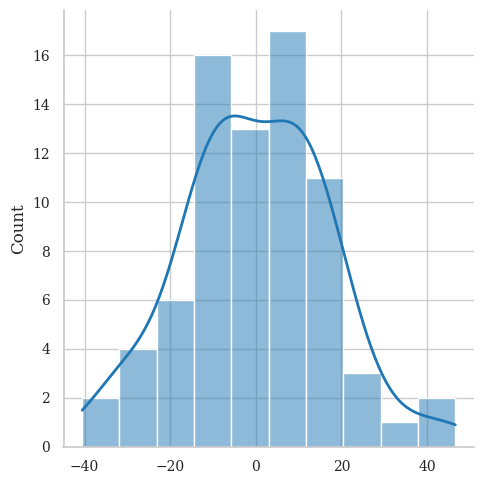

In [ ]:
sns.displot(residuals, bins=10, kde=True, kind="hist")

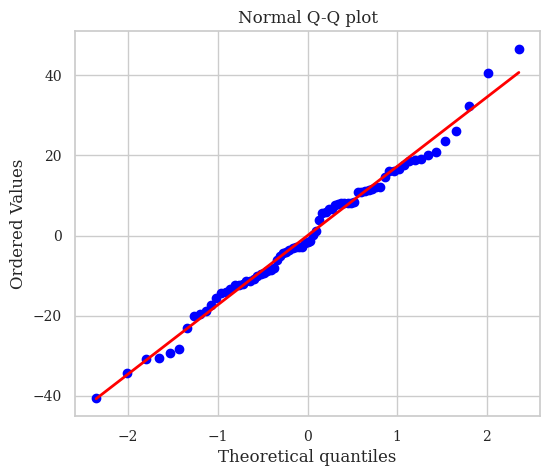

Shapiro-Wilk test p-value: 0.8180796726188109


In [ ]:
# Check for Normality of Residuals
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Normal Q-Q plot")
plt.show()

# Shapiro-Wilk test for normality
_, p_value_shapiro = stats.shapiro(residuals)
print(f"Shapiro-Wilk test p-value: {p_value_shapiro}")

Since p-value is greater that 0.05 we do not reject the null thus we conclude the residuals are normally distributed


## Outliers


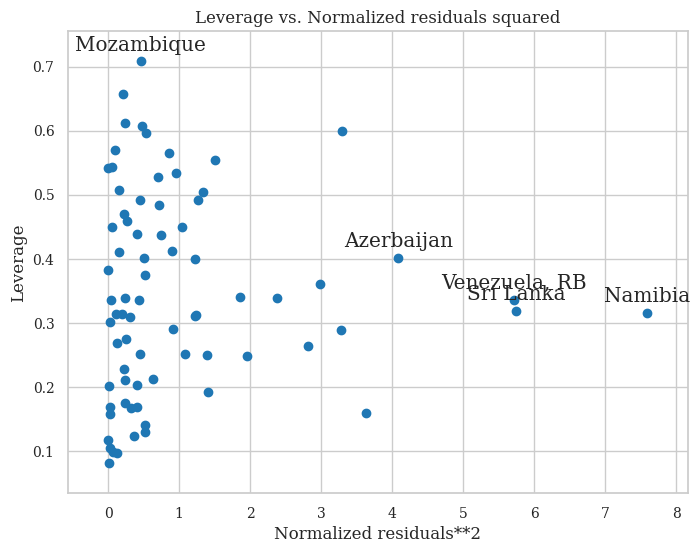

In [ ]:
fig, ax = plt.subplots(figsize=(8,6))
fig = plot_leverage_resid2(results1, ax = ax)

In [ ]:
X.loc['Namibia']

,Namibia
Strength of legal rights index (0=weak to 12=strong),5.000000e+00
Cost of business start-up procedures (% of GNI per capita),1.850000e+01
Time required to get electricity (days),5.400000e+01
Business extent of disclosure index (0=less disclosure to 10=more disclosure),5.000000e+00
"Adjusted net savings, including particulate emission damage (% of GNI)",1.392021e+01
"Unemployment, total (% of total labor force) (national estimate)",2.210000e+01
"Labor force participation rate, total (% of total population ages 15+) (national estimate)",6.020000e+01
Mobile cellular subscriptions (per 100 people),8.949525e+01
Cost to export (US$ per container),1.686000e+03
CO2 emissions (kg per PPP $ of GDP),1.764809e-01


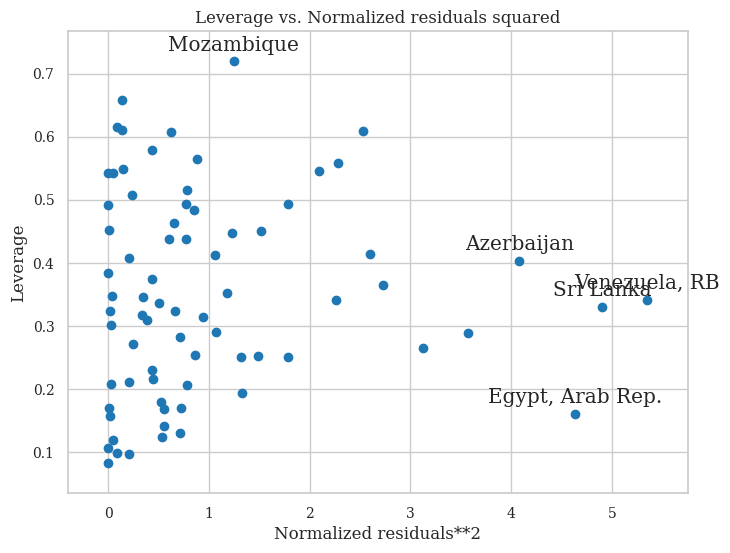

In [ ]:
X_new = X.drop('Namibia')
y_new = y.drop('Namibia')
X_new=sm.add_constant(X_new)
model1_new = sm.OLS(y_new, X_new)
results1_new = model1_new.fit()


fig, ax = plt.subplots(figsize=(8,6))
fig = plot_leverage_resid2(results1_new, ax = ax)

In [ ]:
X = X_new
y = y_new

# Regression for Prediction (using Scikit-Learn)

In [ ]:
X = X.drop(columns=['const'], errors='ignore')
X

,Strength of legal rights index (0=weak to 12=strong),Cost of business start-up procedures (% of GNI per capita),Time required to get electricity (days),Business extent of disclosure index (0=less disclosure to 10=more disclosure),"Adjusted net savings, including particulate emission damage (% of GNI)","Unemployment, total (% of total labor force) (national estimate)","Labor force participation rate, total (% of total population ages 15+) (national estimate)",Mobile cellular subscriptions (per 100 people),Cost to export (US$ per container),CO2 emissions (kg per PPP $ of GDP),...,"Electricity production from renewable sources, excluding hydroelectric (% of total)","Quality of port infrastructure, WEF (1=extremely underdeveloped to 7=well developed and efficient by international standards)",Exports of goods and services (current US$),High-technology exports (% of manufactured exports),"Wage and salaried workers, total (% of total employed)",Interest payments (% of revenue),Merchandise trade (% of GDP),Adjusted savings: particulate emission damage (% of GNI),"Water productivity, total (constant 2005 US$ GDP per cubic meter of total freshwater withdrawal)","Foreign direct investment, net inflows (% of GDP)"
CountryName,,,,,,,,,,,,,,,,,,,,,
Albania,7.333333,31.800000,177.000000,7.000000,6.578035,14.200000,62.200001,85.468247,725.000000,0.163015,...,0.000000,3.540775,3.869106e+09,0.893509,43.799999,20.106492,49.891643,0.926367,6.374924,9.134071
Algeria,2.000000,12.900000,158.000000,4.000000,26.651041,10.000000,41.700001,88.444875,1248.000000,0.261660,...,0.000000,3.200028,6.197541e+10,0.504620,33.000000,0.679670,60.497015,0.226457,18.726756,1.426964
Argentina,2.000000,16.700000,91.000000,7.000000,10.496369,7.700000,60.299999,141.383022,1480.000000,0.228237,...,1.770675,3.761539,8.017600e+10,7.504834,76.400002,36.315760,27.072986,0.032689,8.557491,1.699531
Armenia,5.000000,3.100000,235.000000,5.000000,7.846385,19.000000,61.200001,130.432233,1735.000000,0.223171,...,0.107842,2.866089,1.928926e+09,1.848659,56.900002,3.734249,51.772813,1.019791,2.192711,5.716038
Azerbaijan,2.000000,3.100000,174.000000,7.000000,9.871395,5.600000,64.800003,100.059320,3420.000000,0.216810,...,0.005345,4.187419,2.872867e+10,1.083929,31.900000,0.198602,62.798352,0.257143,1.912852,6.338045
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Upper middle income,4.870748,24.160000,100.355556,5.044444,18.551750,4.425870,67.078532,75.401714,1317.458333,0.479452,...,1.948563,3.872560,3.690637e+12,21.657678,82.328999,5.369508,48.832420,0.319966,8.397855,3.185464
Uruguay,4.000000,42.100000,48.000000,3.000000,9.728590,7.200000,62.900002,131.589018,1100.000000,0.114275,...,8.804002,5.151441,1.061219e+10,6.592827,73.099998,7.949318,38.093687,0.045179,5.703703,5.438960
"Venezuela, RB",1.000000,30.200000,158.000000,3.000000,21.832707,8.600000,64.599998,95.995112,2590.000000,0.419744,...,0.000000,2.430072,1.123532e+11,5.052220,57.000000,15.041737,26.598429,0.049900,9.873950,0.483238


In [ ]:
#model specification
businessreg=sklm.LinearRegression()
businessreg.fit(X, y)

LinearRegression()

In [ ]:
sk_predictions=businessreg.predict(X)

In [ ]:
np.sqrt(mean_squared_error(y, sk_predictions))

15.72980822141098

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.25, random_state=23)
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(55, 25) (55, 1)
(19, 25) (19, 1)


In [ ]:
businessreg2=sklm.LinearRegression()
businessreg2.fit(X_train, Y_train)

LinearRegression()

In [ ]:
regressionSummary(Y_train, businessreg2.predict(X_train))


Regression statistics

                      Mean Error (ME) : -0.0000
       Root Mean Squared Error (RMSE) : 11.7725
            Mean Absolute Error (MAE) : 9.5199
          Mean Percentage Error (MPE) : -1.7077
Mean Absolute Percentage Error (MAPE) : 13.5332


In [ ]:
regressionSummary(Y_test, businessreg2.predict(X_test))


Regression statistics

                      Mean Error (ME) : 3.6492
       Root Mean Squared Error (RMSE) : 33.9196
            Mean Absolute Error (MAE) : 27.2770
          Mean Percentage Error (MPE) : -6.3294
Mean Absolute Percentage Error (MAPE) : 36.9126


In [ ]:
results1 = sm.OLS(y, sm.add_constant(X)).fit()
results1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                                     OLS Regression Results                                                    
===============================================================================================================================
Dep. Variable:     Ease of doing business index (1=most business-friendly regulations)   R-squared:                       0.860
Model:                                                                             OLS   Adj. R-squared:                  0.788
Method:                                                                  Least Squares   F-statistic:                     11.82
Date:                                                                 Tue, 19 Nov 2024   Prob (F-statistic):           4.26e-13
Time:                                                                         05:56:26   Log-Likelihood:                -308.91
No. Observations:                                                                   74   AIC:                             669.8
Df Residuals:                                                                       48   BIC:                             729.7
Df Model:                                                                           25                                         
Covariance Type:                                                             nonrobust                                         
=================================================================================================================================================================================================
                                                                                                                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
const                                                                                                                           156.9222     54.597      2.874      0.006      47.147     266.697
Strength of legal rights index (0=weak to 12=strong)                                                                             -3.9471      1.166     -3.385      0.001      -6.292      -1.602
Cost of business start-up procedures (% of GNI per capita)                                                                        0.4471      0.087      5.127      0.000       0.272       0.622
Time required to get electricity (days)                                                                                           0.1110      0.050      2.213      0.032       0.010       0.212
Business extent of disclosure index (0=less disclosure to 10=more disclosure)                                                    -3.7252      1.367     -2.724      0.009      -6.474      -0.976
Adjusted net savings, including particulate emission damage (% of GNI)                                                            0.6024      0.394      1.530      0.133      -0.189       1.394
Unemployment, total (% of total labor force) (national estimate)                                                                 -1.4331      0.587     -2.442      0.018      -2.613      -0.253
Labor force participation rate, total (% of total population ages 15+) (national estimate)                                       -0.0958      0.382     -0.251      0.803      -0.863       0.672
Mobile cellular subscriptions (per 100 people)                                                                                   -0.0489      0.128     -0.383      0.703      -0.306       0.208
Cost to export (US$ per container)                                                                                               -0.0013      0.004     -0.299      0.766      -0.010       0.007
CO2 emissions (kg per 

In [ ]:
#loading our usual libraries


import shap

#pandas and numpy
import pandas as pd
import numpy as np

#Scikit stuff
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, \
                            BaggingClassifier, BaggingRegressor, \
                            GradientBoostingRegressor, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, KFold, cross_validate, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix, \
                            classification_report, precision_score, \
                            accuracy_score, roc_curve, roc_auc_score
# import scikitplot as skplt

#dmba stuff
from dmba import regressionSummary, exhaustive_search
from dmba import adjusted_r2_score, AIC_score, BIC_score
from dmba import classificationSummary, gainsChart, liftChart, plotDecisionTree

# visualization and tuning the aesthetics
import matplotlib.pylab as plt
import seaborn as sns
%matplotlib inline
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1, rc={"lines.linewidth": 2,'font.family': [u'times']})
# plt.style.use('seaborn-whitegrid')
plt.rc('text', usetex = False)
plt.rc('font', family = 'serif')
plt.rc('xtick', labelsize = 10)
plt.rc('ytick', labelsize = 10)
plt.rc('font', size = 12)
plt.rc('figure', figsize = (6, 5))




In [ ]:
X

,Strength of legal rights index (0=weak to 12=strong),Cost of business start-up procedures (% of GNI per capita),Time required to get electricity (days),Business extent of disclosure index (0=less disclosure to 10=more disclosure),"Adjusted net savings, including particulate emission damage (% of GNI)","Unemployment, total (% of total labor force) (national estimate)","Labor force participation rate, total (% of total population ages 15+) (national estimate)",Mobile cellular subscriptions (per 100 people),Cost to export (US$ per container),CO2 emissions (kg per PPP $ of GDP),...,"Electricity production from renewable sources, excluding hydroelectric (% of total)","Quality of port infrastructure, WEF (1=extremely underdeveloped to 7=well developed and efficient by international standards)",Exports of goods and services (current US$),High-technology exports (% of manufactured exports),"Wage and salaried workers, total (% of total employed)",Interest payments (% of revenue),Merchandise trade (% of GDP),Adjusted savings: particulate emission damage (% of GNI),"Water productivity, total (constant 2005 US$ GDP per cubic meter of total freshwater withdrawal)","Foreign direct investment, net inflows (% of GDP)"
CountryName,,,,,,,,,,,,,,,,,,,,,
Albania,7.333333,31.800000,177.000000,7.000000,6.578035,14.200000,62.200001,85.468247,725.000000,0.163015,...,0.000000,3.540775,3.869106e+09,0.893509,43.799999,20.106492,49.891643,0.926367,6.374924,9.134071
Algeria,2.000000,12.900000,158.000000,4.000000,26.651041,10.000000,41.700001,88.444875,1248.000000,0.261660,...,0.000000,3.200028,6.197541e+10,0.504620,33.000000,0.679670,60.497015,0.226457,18.726756,1.426964
Argentina,2.000000,16.700000,91.000000,7.000000,10.496369,7.700000,60.299999,141.383022,1480.000000,0.228237,...,1.770675,3.761539,8.017600e+10,7.504834,76.400002,36.315760,27.072986,0.032689,8.557491,1.699531
Armenia,5.000000,3.100000,235.000000,5.000000,7.846385,19.000000,61.200001,130.432233,1735.000000,0.223171,...,0.107842,2.866089,1.928926e+09,1.848659,56.900002,3.734249,51.772813,1.019791,2.192711,5.716038
Azerbaijan,2.000000,3.100000,174.000000,7.000000,9.871395,5.600000,64.800003,100.059320,3420.000000,0.216810,...,0.005345,4.187419,2.872867e+10,1.083929,31.900000,0.198602,62.798352,0.257143,1.912852,6.338045
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Upper middle income,4.870748,24.160000,100.355556,5.044444,18.551750,4.425870,67.078532,75.401714,1317.458333,0.479452,...,1.948563,3.872560,3.690637e+12,21.657678,82.328999,5.369508,48.832420,0.319966,8.397855,3.185464
Uruguay,4.000000,42.100000,48.000000,3.000000,9.728590,7.200000,62.900002,131.589018,1100.000000,0.114275,...,8.804002,5.151441,1.061219e+10,6.592827,73.099998,7.949318,38.093687,0.045179,5.703703,5.438960
"Venezuela, RB",1.000000,30.200000,158.000000,3.000000,21.832707,8.600000,64.599998,95.995112,2590.000000,0.419744,...,0.000000,2.430072,1.123532e+11,5.052220,57.000000,15.041737,26.598429,0.049900,9.873950,0.483238


In [ ]:
y.loc['China']


,China
Ease of doing business index (1=most business-friendly regulations),83.5


# Ensembles and Decision Tree Regressions

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.25, random_state=7)
X_test

,Strength of legal rights index (0=weak to 12=strong),Cost of business start-up procedures (% of GNI per capita),Time required to get electricity (days),Business extent of disclosure index (0=less disclosure to 10=more disclosure),"Adjusted net savings, including particulate emission damage (% of GNI)","Unemployment, total (% of total labor force) (national estimate)","Labor force participation rate, total (% of total population ages 15+) (national estimate)",Mobile cellular subscriptions (per 100 people),Cost to export (US$ per container),CO2 emissions (kg per PPP $ of GDP),...,"Electricity production from renewable sources, excluding hydroelectric (% of total)","Quality of port infrastructure, WEF (1=extremely underdeveloped to 7=well developed and efficient by international standards)",Exports of goods and services (current US$),High-technology exports (% of manufactured exports),"Wage and salaried workers, total (% of total employed)",Interest payments (% of revenue),Merchandise trade (% of GDP),Adjusted savings: particulate emission damage (% of GNI),"Water productivity, total (constant 2005 US$ GDP per cubic meter of total freshwater withdrawal)","Foreign direct investment, net inflows (% of GDP)"
CountryName,,,,,,,,,,,,,,,,,,,,,
East Asia & Pacific (developing only),6.142857,33.688889,98.611111,4.111111,28.164512,3.484904,70.844648,69.924212,827.900000,0.562909,...,1.935312,4.016747,2.397125e+12,27.516225,80.236765,3.279712,55.628446,0.406629,3.999657,3.833002
Europe & Central Asia (all income levels),5.632653,7.402128,121.680851,5.702128,8.876502,9.101690,59.553975,120.258598,1430.541667,0.294572,...,5.917781,4.428731,7.954593e+12,15.139108,81.917275,4.264406,59.885516,0.206527,31.344055,3.254339
OECD members,5.892157,5.658065,89.322581,6.129032,6.444405,8.255149,60.098183,101.344870,1053.941176,0.289473,...,5.364055,5.201968,1.152671e+13,16.962258,83.718789,5.350981,42.565598,0.151286,33.333449,2.223039
Chile,4.000000,6.800000,30.000000,8.000000,6.278559,8.100000,58.500000,115.751384,745.000000,0.232618,...,4.267465,5.460815,8.279481e+10,5.493882,73.500000,2.096870,59.904849,0.077127,4.346202,7.228707
Panama,6.000000,10.200000,35.000000,3.000000,26.612388,6.500000,63.500000,180.699204,565.000000,0.164896,...,0.296536,5.997463,2.033700e+10,0.826046,65.900002,19.938971,96.215762,0.095895,27.730140,8.846710
Honduras,9.000000,40.500000,39.000000,0.000000,10.969997,4.800000,62.200001,124.718758,1193.000000,0.254283,...,2.360927,5.334097,7.247911e+09,2.582057,44.299999,3.894267,95.783004,0.559035,7.398116,3.060965
Argentina,2.000000,16.700000,91.000000,7.000000,10.496369,7.700000,60.299999,141.383022,1480.000000,0.228237,...,1.770675,3.761539,8.017600e+10,7.504834,76.400002,36.315760,27.072986,0.032689,8.557491,1.699531
"Egypt, Arab Rep.",2.000000,10.900000,64.000000,5.000000,6.676844,9.000000,51.700001,90.503192,613.000000,0.252072,...,1.160795,4.200135,4.673101e+10,0.876451,62.200001,20.502389,36.256225,0.520357,1.526377,2.917287
Middle income,4.743333,35.097778,103.055556,4.644444,18.537874,5.101518,62.806959,71.177680,1383.989796,0.417163,...,2.195346,3.762512,4.882712e+12,18.520351,57.840486,6.275963,47.486721,0.478245,4.126881,2.908866


In [ ]:
# Bagging: Decide the parameters for the new Decision Tree with ensemble
DTsalesreg_bag=RandomForestRegressor(max_features=25, random_state=23) # Bagging is special case of RF, when we use all features (3 in this case).

# Random forest: Decide the parameters for the new Decision Tree with ensemble
DTsalesreg_RF=RandomForestRegressor(max_features=20, random_state=23)

# Boosting: Decide the parameters for the new Decision Tree with ensemble
DTsalesreg_boost=GradientBoostingRegressor(n_estimators=1000, learning_rate=0.01, random_state=23)

In [ ]:
# Fit the bagging model on training data
# Since we are using the training portion of the data, we are now "training" our model.
DTsalesreg_bag.fit(X_train, Y_train)

# Fit the random forest model on training data
# Since we are using the training portion of the data, we are now "training" our model.
DTsalesreg_RF.fit(X_train, Y_train)

# Fit the boosting model on training data
# Since we are using the training portion of the data, we are now "training" our model.
DTsalesreg_boost.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


GradientBoostingRegressor(learning_rate=0.01, n_estimators=1000,
                          random_state=23)

In [ ]:
# Now, get the predicted values and evaluate the training of the new decision tree models:
DTbag_predictions_tr=DTsalesreg_bag.predict(X_train) # predictions for training set

# Now, get the predicted values and evaluate the training of the new decision tree models:
DTRF_predictions_tr=DTsalesreg_RF.predict(X_train) # predictions for training set

# Now, get the predicted values and evaluate the training of the new decision tree models:
DTboost_predictions_tr=DTsalesreg_boost.predict(X_train) # predictions for training set

In [ ]:
# How good is this prediction of bagging in training?
regressionSummary(Y_train, DTbag_predictions_tr)

# How good is this prediction of random forest in training?
regressionSummary(Y_train, DTRF_predictions_tr)

# How good is this prediction of random forest in training?
regressionSummary(Y_train,DTboost_predictions_tr)


Regression statistics

                      Mean Error (ME) : -0.1263
       Root Mean Squared Error (RMSE) : 11.0121
            Mean Absolute Error (MAE) : 8.5358
          Mean Percentage Error (MPE) : -8.9588
Mean Absolute Percentage Error (MAPE) : 16.2026

Regression statistics

                      Mean Error (ME) : 0.3339
       Root Mean Squared Error (RMSE) : 10.8038
            Mean Absolute Error (MAE) : 8.2783
          Mean Percentage Error (MPE) : -7.9283
Mean Absolute Percentage Error (MAPE) : 15.5408

Regression statistics

                      Mean Error (ME) : -0.0000
       Root Mean Squared Error (RMSE) : 0.5475
            Mean Absolute Error (MAE) : 0.4632
          Mean Percentage Error (MPE) : -0.3172
Mean Absolute Percentage Error (MAPE) : 0.8199


/usr/local/lib/python3.10/dist-packages/shap/plots/_beeswarm.py:950: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  pl.tight_layout()


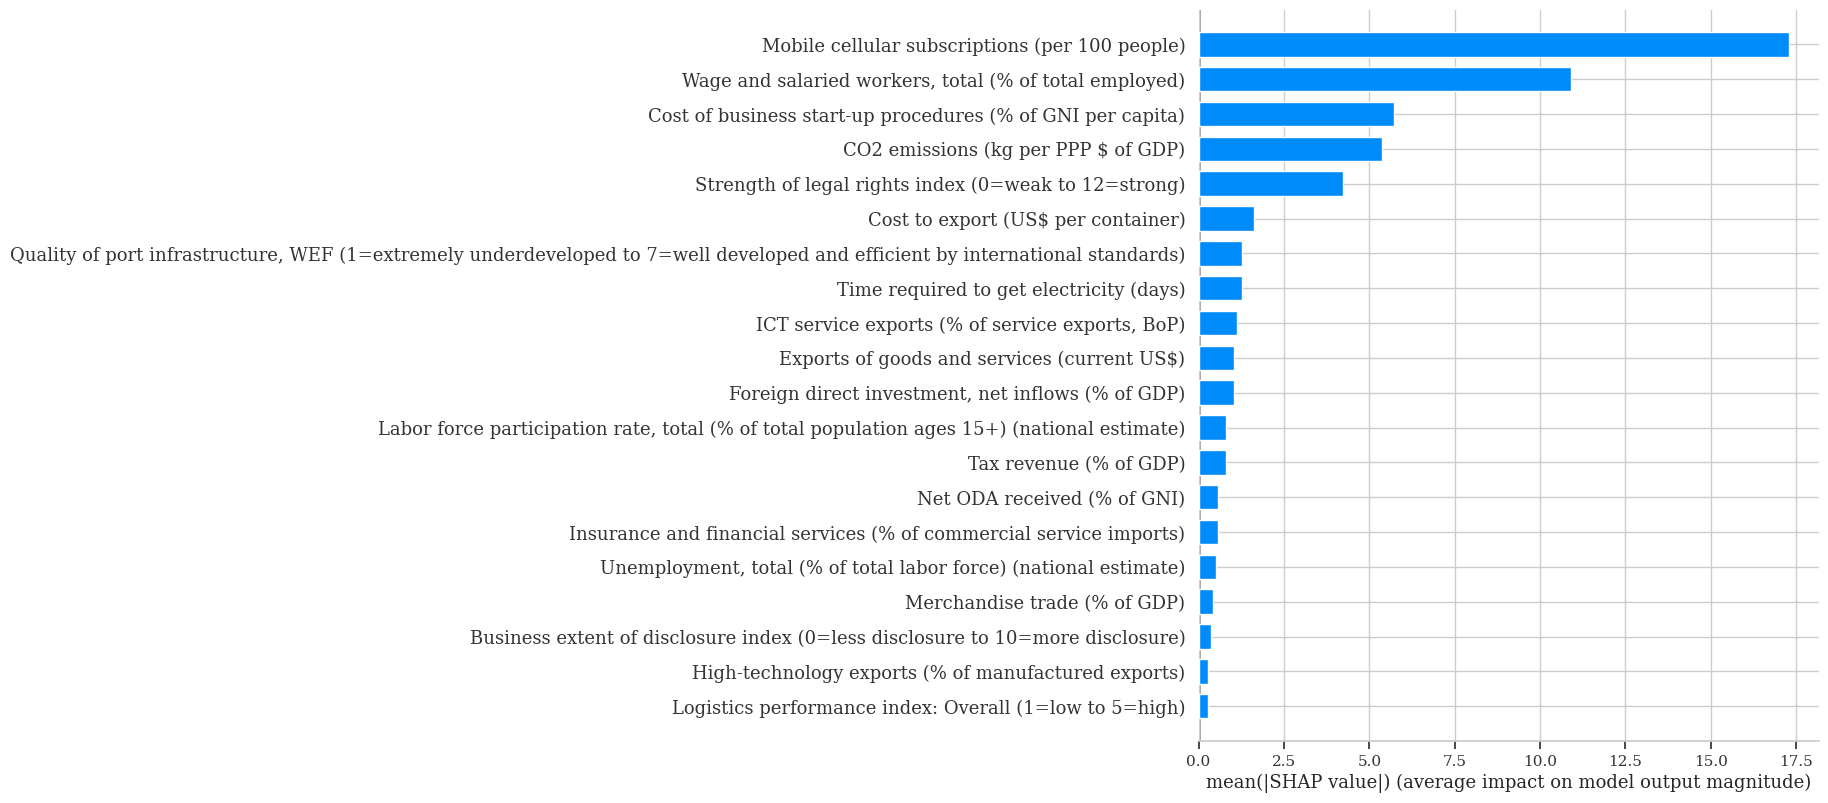

/usr/local/lib/python3.10/dist-packages/shap/plots/_beeswarm.py:950: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  pl.tight_layout()


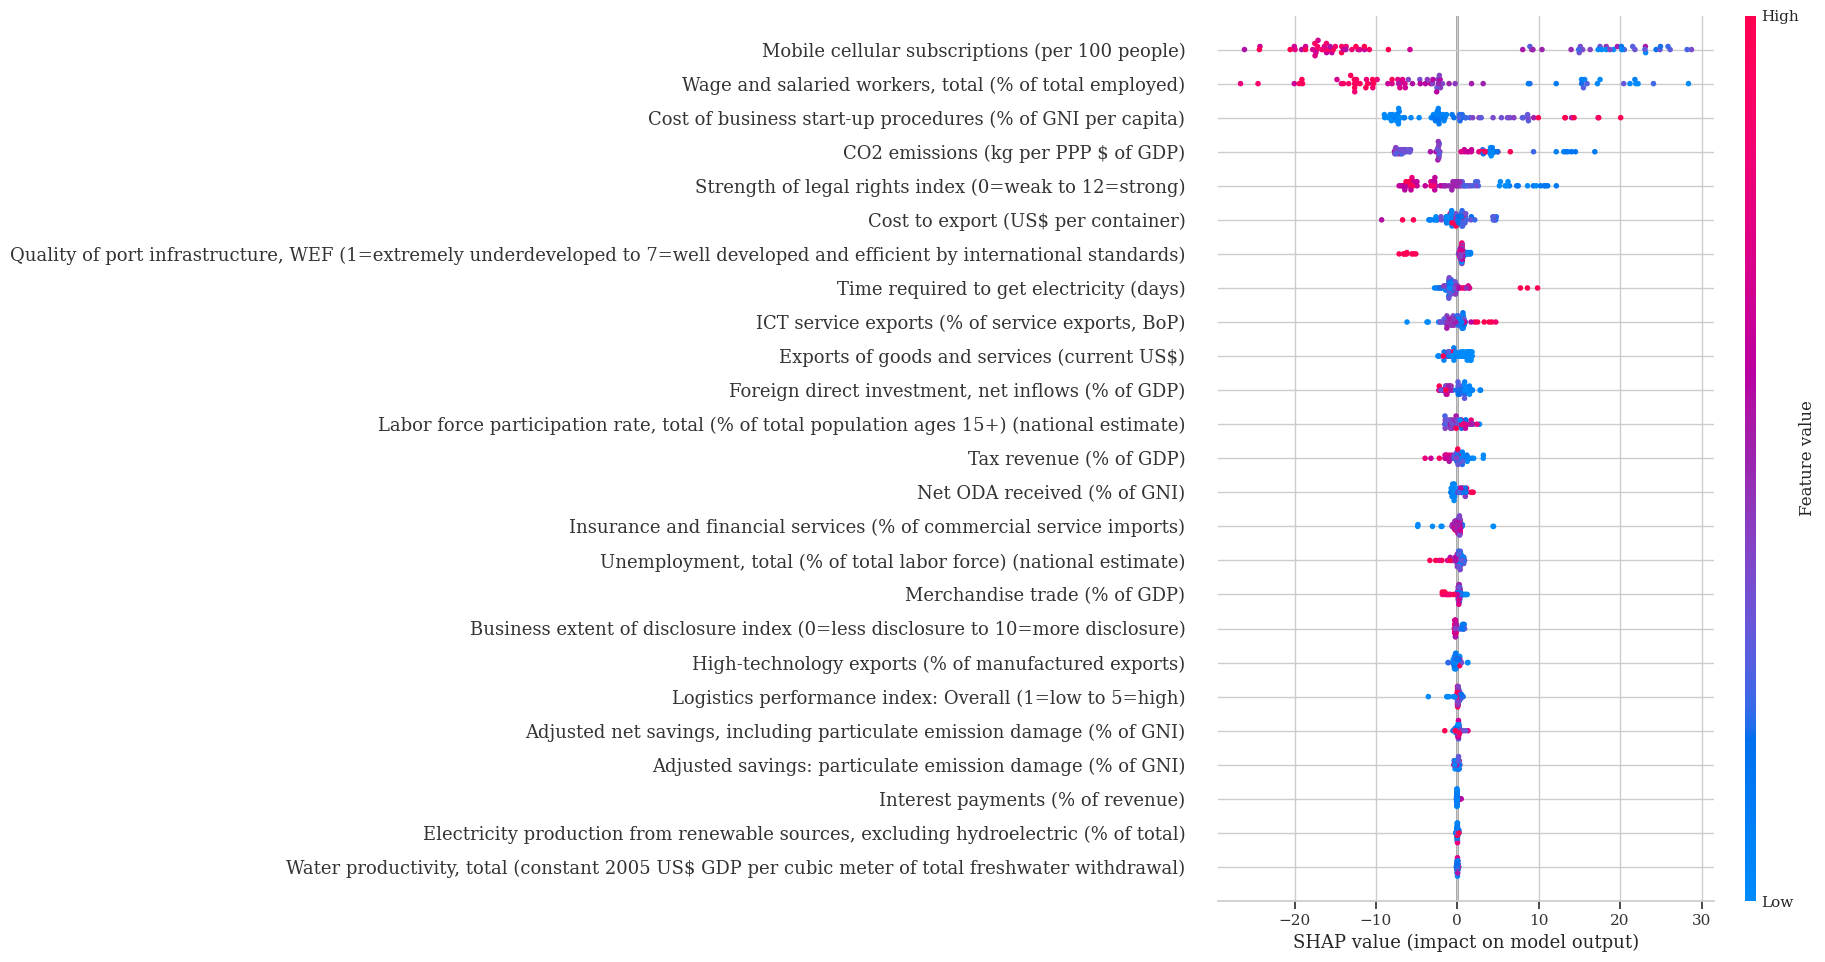

In [ ]:
# from the above we can see that Boosting has best RMSE
explainer = shap.TreeExplainer(DTsalesreg_boost)
shap_values=explainer.shap_values(X)
expected_value = explainer.expected_value

shap.summary_plot(shap_values, X, plot_type="bar")

shap.summary_plot(shap_values, X, max_display=30)

In [ ]:
X.index.get_loc('India')

34

In [ ]:
matching_rows = X.loc[X.index.str.contains('East Asia & Pacific')]
print(matching_rows)

                                         Strength of legal rights index (0=weak to 12=strong)  \
CountryName                                                                                     
East Asia & Pacific (all income levels)                                           6.356322      
East Asia & Pacific (developing only)                                             6.142857      

                                         Cost of business start-up procedures (% of GNI per capita)  \
CountryName                                                                                           
East Asia & Pacific (all income levels)                                          25.704000            
East Asia & Pacific (developing only)                                            33.688889            

                                         Time required to get electricity (days)  \
CountryName                                                                        
East Asia & Pacific (all incom

In [ ]:
matching_rows = X.loc[X.index.str.contains('European Union')]
print(matching_rows)

                Strength of legal rights index (0=weak to 12=strong)  \
CountryName                                                            
European Union                                           5.678571      

                Cost of business start-up procedures (% of GNI per capita)  \
CountryName                                                                  
European Union                                           5.711111            

                Time required to get electricity (days)  \
CountryName                                               
European Union                               112.481481   

                Business extent of disclosure index (0=less disclosure to 10=more disclosure)  \
CountryName                                                                                     
European Union                                           5.814815                               

                Adjusted net savings, including particulate emission damage (%

In [ ]:
matching_rows = X.loc[X.index.str.contains('South Africa')]
print(matching_rows)

              Strength of legal rights index (0=weak to 12=strong)  \
CountryName                                                          
South Africa                                                5.0      

              Cost of business start-up procedures (% of GNI per capita)  \
CountryName                                                                
South Africa                                                6.0            

              Time required to get electricity (days)  \
CountryName                                             
South Africa                                    214.0   

              Business extent of disclosure index (0=less disclosure to 10=more disclosure)  \
CountryName                                                                                   
South Africa                                                8.0                               

              Adjusted net savings, including particulate emission damage (% of GNI)  \
CountryName   

In [ ]:
shap.initjs()
print('India')
shap.force_plot(explainer.expected_value, shap_values[X.index.get_loc('India'),:], X.iloc[X.index.get_loc('India'),:])


India


In [ ]:
shap.initjs()
print('China')

shap.force_plot(explainer.expected_value, shap_values[X.index.get_loc('China'),:], X.iloc[X.index.get_loc('China'),:])


China


In [ ]:
shap.initjs()
print('Argentina')

shap.force_plot(explainer.expected_value, shap_values[X.index.get_loc('Argentina'),:], X.iloc[X.index.get_loc('Argentina'),:])


Argentina


In [ ]:
shap.initjs()

shap.force_plot(explainer.expected_value, shap_values[X.index.get_loc('European Union'),:], X.iloc[X.index.get_loc('European Union'),:])


In [ ]:
shap.initjs()

shap.force_plot(explainer.expected_value, shap_values[X.index.get_loc('South Asia'),:], X.iloc[X.index.get_loc('South Asia'),:])


In [ ]:
shap.initjs()
print('Bangladesh')
shap.force_plot(explainer.expected_value, shap_values[X.index.get_loc('Bangladesh'),:], X.iloc[X.index.get_loc('Bangladesh'),:])


Bangladesh


In [ ]:

# # Sort the DataFrame by the 'Ease of doing business index (1=most business-friendly regulations)' column in descending order
# y = y.sort_values(by='Ease of doing business index (1=most business-friendly regulations)', ascending=True)
# y

In [ ]:
# prompt: combine X and y dataframe and give me dataset_2010

# Assuming X and y are already defined as in your provided code.

# Combine X and y DataFrames
dataset_2010 = pd.concat([X, y], axis=1)

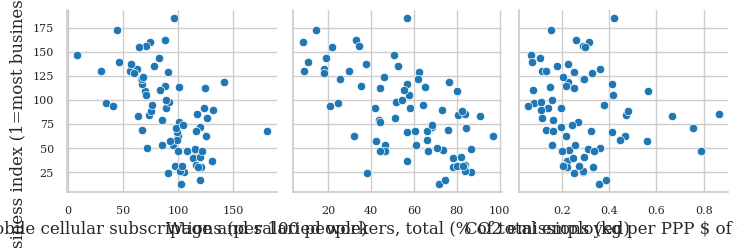

In [ ]:
sns.pairplot(data=dataset_2010, y_vars=['Ease of doing business index (1=most business-friendly regulations)'], x_vars=['Mobile cellular subscriptions (per 100 people)', 'Wage and salaried workers, total (% of total employed)', 'CO2 emissions (kg per PPP $ of GDP)'])

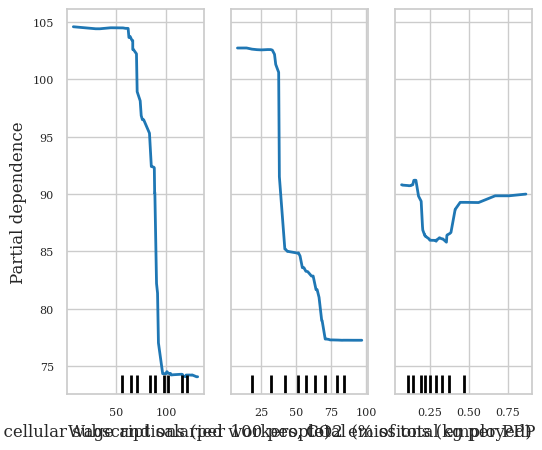

In [ ]:
from sklearn.inspection import PartialDependenceDisplay
features = ['Mobile cellular subscriptions (per 100 people)', 'Wage and salaried workers, total (% of total employed)', 'CO2 emissions (kg per PPP $ of GDP)']

PartialDependenceDisplay.from_estimator(DTsalesreg_bag, X_train, features)